In [1]:
cnfl=[false]
include("PVCR.jl")

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/arnavgautam/.julia/packages/PyPlot/4wzW1/src/init.jl:192


12-element Array{Float64,1}:
 42.35930677572868 
 43.0785589650421  
 42.394224465839216
 45.343163807121606
 42.29728640436372 
 42.56605829576826 
 41.027884582241974
 40.784783966947366
 40.47773068077983 
 42.012421645464734
 43.00006019721416 
 40.152405298225425

In [2]:
include("functions/plotting_base_gd.jl")

plot_segmented_tariff_category_with_regression (generic function with 3 methods)

# Experimenting with various model parameters

## Loading in the Base GD data

In [3]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} ICE customers

all_ice = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "ICE"), base_GD)

5561×17 DataFrame. Omitted printing of 13 columns
│ Row  │ ANNO  │ MES   │ ENERGIA_GENERADA │ ENERGIA_DEPOSITADA │
│      │ Int64 │ Int64 │ Float64⍰         │ Float64⍰           │
├──────┼───────┼───────┼──────────────────┼────────────────────┤
│ 1    │ 2018  │ 1     │ 1511.0           │ 774.0              │
│ 2    │ 2018  │ 2     │ 1343.0           │ 718.0              │
│ 3    │ 2018  │ 3     │ 1537.0           │ 665.0              │
│ 4    │ 2018  │ 4     │ 1789.0           │ 898.0              │
│ 5    │ 2018  │ 5     │ 1623.0           │ 944.0              │
│ 6    │ 2018  │ 6     │ 1108.0           │ 530.0              │
│ 7    │ 2018  │ 7     │ 1398.0           │ 632.0              │
│ 8    │ 2018  │ 8     │ 1265.0           │ 653.0              │
│ 9    │ 2018  │ 9     │ 1321.0           │ 753.0              │
│ 10   │ 2018  │ 10    │ 1381.0           │ 984.0              │
⋮
│ 5551 │ 2017  │ 2     │ 1264.0           │ 733.0              │
│ 5552 │ 2017  │ 3     │ 1385.0           │ 819.0              │
│ 5553 │ 2017  │ 4     │ 1478.0           │ 890.0              │
│ 5554 │ 2017  │ 5     │ 1238.0           │ 700.0              │
│ 5555 │ 2017  │ 6     │ 1.0              │ 0.0                │
│ 5556 │ 2017  │ 7     │ 304.0            │ 106.0              │
│ 5557 │ 2017  │ 8     │ 326.0            │ 42.0               │
│ 5558 │ 2017  │ 9     │ 613.0            │ 222.0              │
│ 5559 │ 2017  │ 10    │ 989.0            │ 549.0              │
│ 5560 │ 2017  │ 11    │ 886.0            │ 432.0              │
│ 5561 │ 2017  │ 12    │ 927.0            │ 463.0              │

In [4]:
res_consumption = vcat(100:100:1500, 2000:500:4000)

20-element Array{Int64,1}:
  100
  200
  300
  400
  500
  600
  700
  800
  900
 1000
 1100
 1200
 1300
 1400
 1500
 2000
 2500
 3000
 3500
 4000

## Varying the Annual Percentage Rate available to consumers

In [5]:
changing_apr_model_predictions = []
changing_apr_descriptions = []
for i in 0.085:0.005:0.12
    new_BAC1 = Financial(0.045, i, 5, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_apr_model_predictions, res_model_predictions)
    push!(changing_apr_descriptions, string("APR = ", i))
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = create_consumption_and_installation_arrays(::DataFrame) at plotting_base_gd.jl:80
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:80
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = create_consumption_and_installation_arrays(::DataFrame) at plotting_base_gd.jl:80
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:80


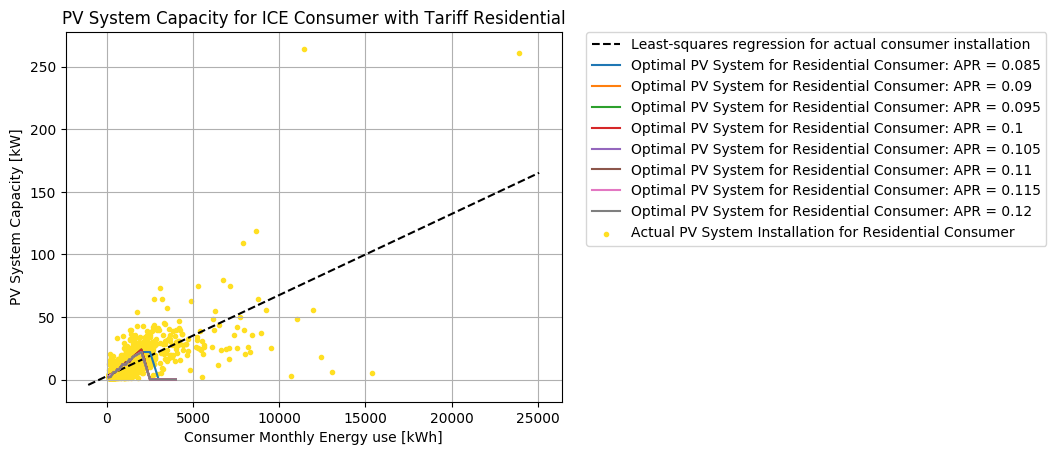

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#127(::Array{Any,1}, ::Nothing, ::Nothing, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:122
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:122
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#127(::Array{Any,1}, ::Nothing, ::Nothing, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:123
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:123


PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [6]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_apr_model_predictions; model_descriptions=changing_apr_descriptions, linreg=true)

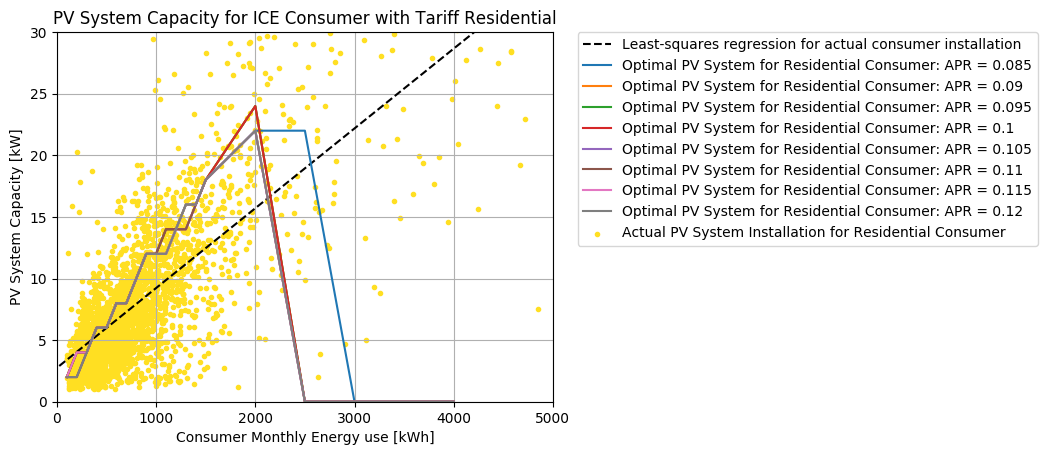

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#127(::Array{Any,1}, ::Int64, ::Int64, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:122
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:122
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #plot_base_GD_vs_economically_rational#127(::Array{Any,1}, ::Int64, ::Int64, ::Bool, ::Function, ::Array{Array{Float64,1},1}, ::String, ::String, ::Array{Int64,1}, ::Array{Any,1}) at plotting_base_gd.jl:123
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/plotting_base_gd.jl:123


PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [7]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_apr_model_predictions; model_descriptions=changing_apr_descriptions, x_max=5000, y_max=30, linreg=true)

#### As we see, changing the APR available to consumers has the effect of extending the model along the same slope. This translates to users with higher consumption rates, who would otherwise not find PV system installation worthwhile, now see financial incentive to install quite large systems. 

## Varying the consumer's expectation of years until financial payoff of the system

In [8]:
changing_years_model_predictions = []
changing_years_descriptions = []
for i in 3:1:10
    new_BAC1 = Financial(0.045, 0.085, i, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_years_model_predictions, res_model_predictions)
    push!(changing_years_descriptions, string("Years till payback = ", i))
end

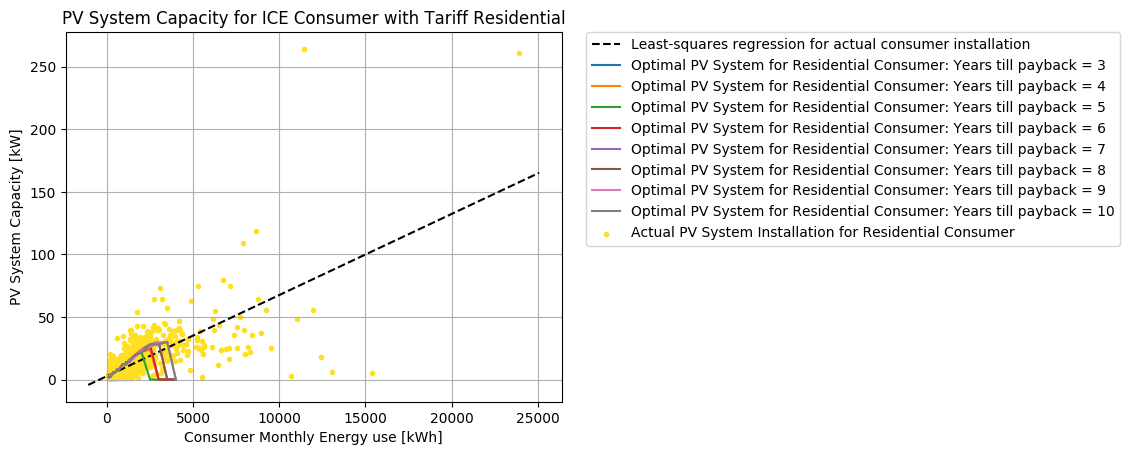

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [9]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_years_model_predictions; model_descriptions=changing_years_descriptions, linreg=true)

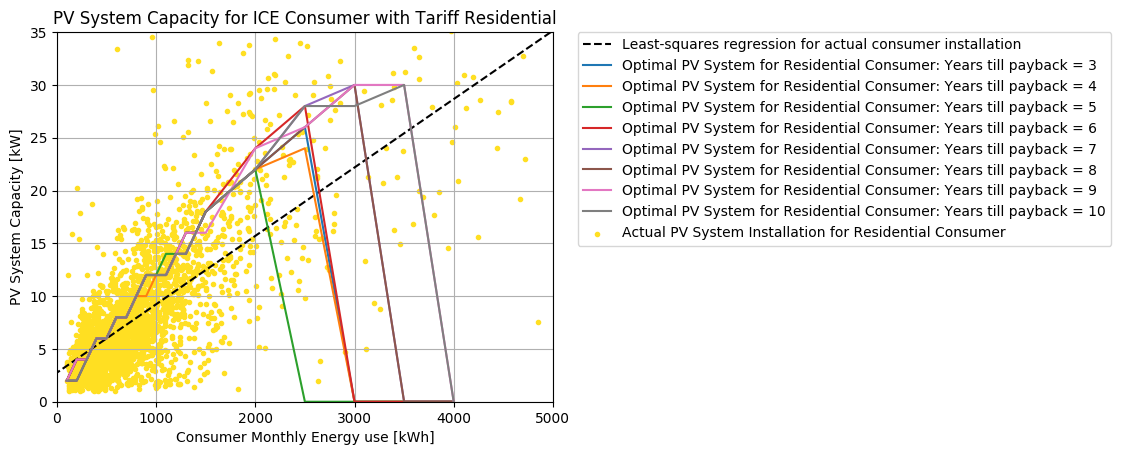

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [11]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_years_model_predictions; model_descriptions=changing_years_descriptions, x_max=5000, y_max=35, linreg=true)

#### Increasing the number of years until payoff is expected, has the effect of extending the model along the same slope. This translates to users with higher consumption rates, who would otherwise not find PV system installation worthwhile, now see financial incentive to install quite large systems. 

## Varying both APR and expected years until payoff

In [12]:
both_inc_model_predictions = []
both_inc_descriptions = []
all_aprs = [0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12]
all_years = [3,4,5,6,7,8,9,10]
for i in 1:length(all_aprs)
    apr = all_aprs[i]
    yrs = all_years[i]
    new_BAC1 = Financial(0.045, apr, yrs, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(both_inc_model_predictions, res_model_predictions)
    push!(both_inc_descriptions, string("APR = ", apr, ", Years = ", yrs))
end

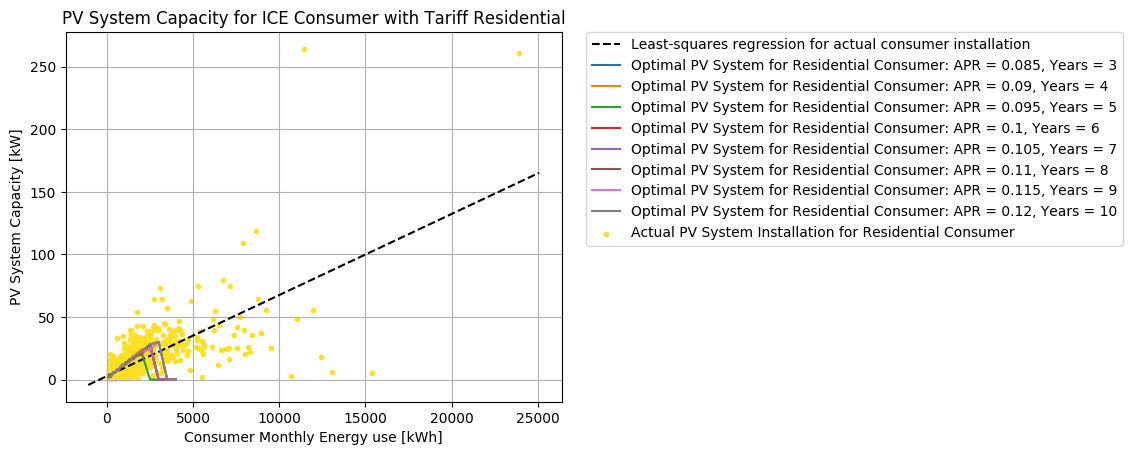

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [13]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, both_inc_model_predictions; model_descriptions=both_inc_descriptions, linreg=true)

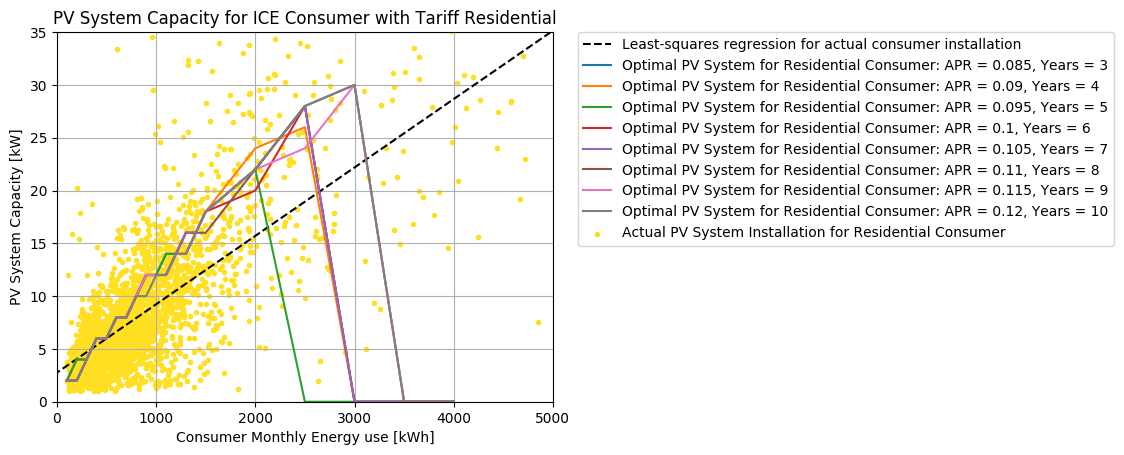

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [14]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, both_inc_model_predictions; model_descriptions=both_inc_descriptions, x_max=5000,y_max=35, linreg=true)

#### This has a similar effect to just increasing the expected years until payoff, or increasing APR. However, it can also be noted that the model is quicker to reach a dropoff for the most long-term views. Even the heaviest consumers looking one decade ahead for payoffs would typically be okay installing PV systems, but when interest rates are as high as 12% they are no longer incentivised to do so.

## Varying the expectation of tariff increases over time

In [15]:
tariff_inc_model_predictions = []
tariff_inc_descriptions = []
for i in 0.02:0.02:0.1
    new_R_ICE = Tariff("ICE",
                "Residential",
                [(0:40.99,  3189.60), (41:200.99,  79.74), (201:1000, 143.71)],
                [(0:100, 0.0)],
                i,
                21.03,
                4.50,
                0.01,
                [0.992832136 0.999770704 1.00427654 0.983489891 1.009385917 1.012387984 0.979508228 0.994153679 0.97686098 1.015651323 1.015252586 1.016430032],
				3189.60);
    ice_residential.tariff = new_R_ICE
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(tariff_inc_model_predictions, res_model_predictions)
    push!(tariff_inc_descriptions, string("Tariff = ", i))
end

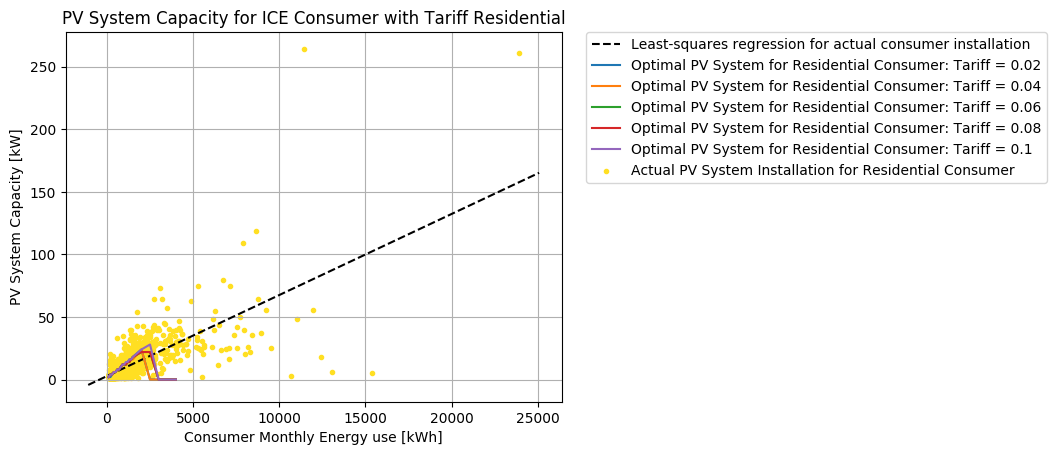

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [16]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, tariff_inc_model_predictions; model_descriptions=tariff_inc_descriptions, linreg=true)

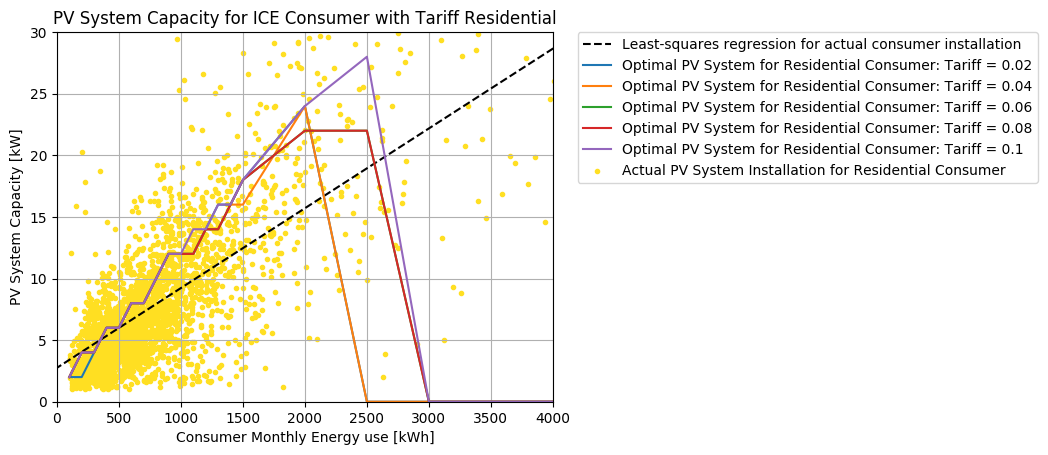

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [17]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, tariff_inc_model_predictions; model_descriptions=tariff_inc_descriptions, x_max=4000,y_max=30, linreg=true)

#### This has the effect of slightly increasing the dropoff point when the expected tariff increase is its largest

## Varying the costs associated with PV systems of different capacities

In [18]:
cost_tuples = [(2000,1800,1700,1500,1000),(2200,2000,1900,1700,1200),(3000,2300,1950,1625,1050)]
changing_cost_ranges_model_predictions = []
changing_cost_ranges_descriptions = []
for cost_tuple in cost_tuples
    r1,r2,r3,r4,r5 = cost_tuple
    new_ice_PVRes = PVSystem(1.8,
                [171,155,132,115,104,92,96,111,115,125,114,153],
                0.08,
                [(0:3.0, r1), (3.0:5.0, r2), (5.0:10.0, r3), (10.0:100.0, r4), (100.0:1000.0, r5)],
                15000,
                pv_output)
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, new_ice_PVRes, 0.0:2:30, BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_cost_ranges_model_predictions, res_model_predictions)
    push!(changing_cost_ranges_descriptions, string("PV system costs = ", cost_tuple))
end


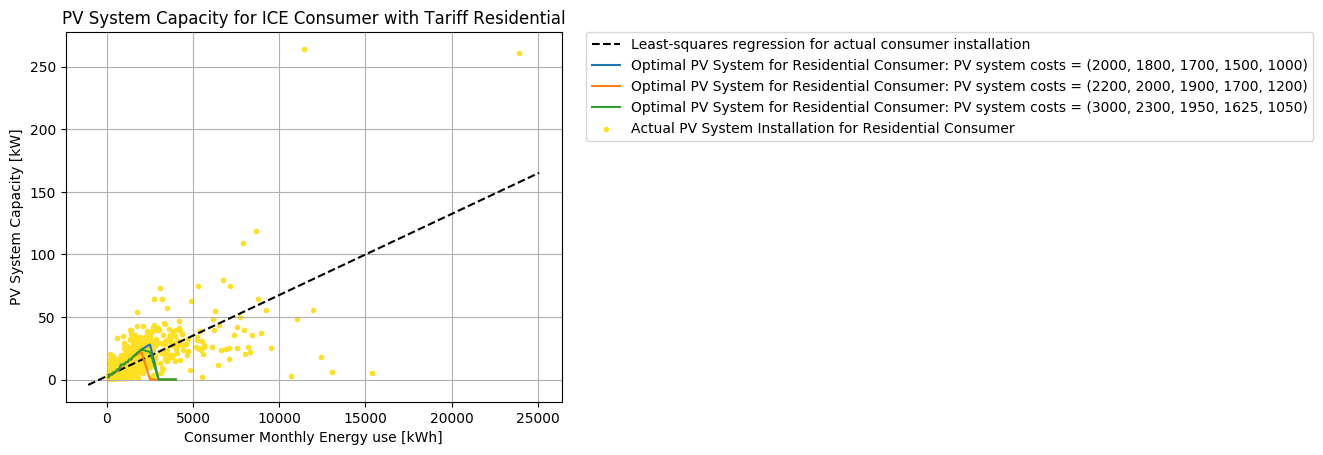

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [19]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_cost_ranges_model_predictions; model_descriptions=changing_cost_ranges_descriptions, linreg=true)

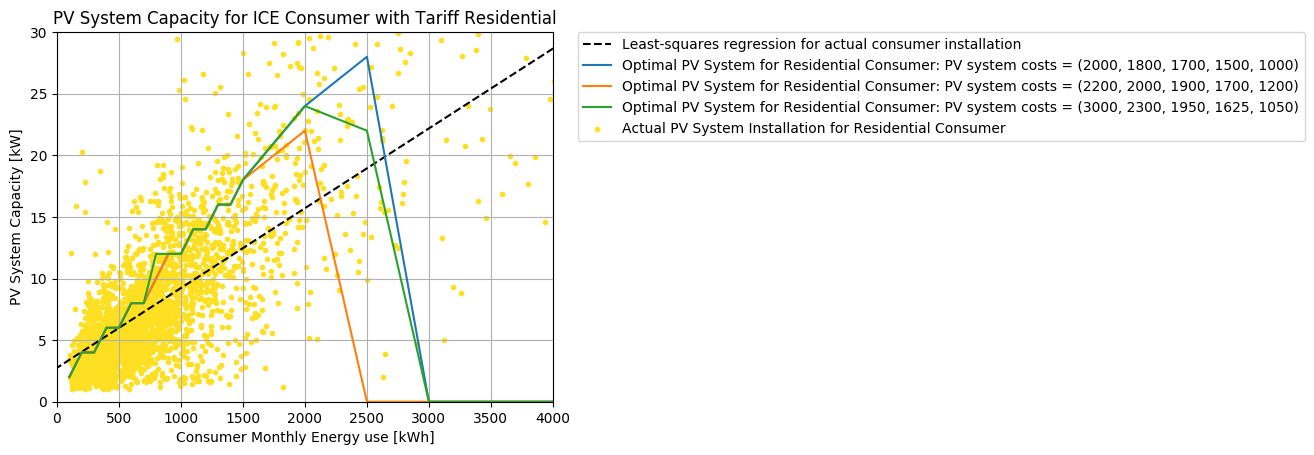

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [20]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_cost_ranges_model_predictions; model_descriptions=changing_cost_ranges_descriptions, x_max=4000, y_max=30, linreg=true)

#### Increasing the costs associated with various ranges of PV system capacities has some interesting results here. It seems like a uniform increase in costs across capacities, results in a quicker dropoff of expected adoption to zero. However, an uneven increase, where prices of lower capacity systems are increased more than higher capacity systems, results in the dropoff point being maintained, with just a slight lowering of adoption rates for the heaviest consumers. In both cases, the consumers using less than 2000kWh per month are practically unchanging in their expected behavior